In [96]:
import string
import numpy as np

In [97]:
phrase = "To be, or not to be, that is the question"

In [98]:
phrase_list = [i for i in phrase]

In [99]:
def generate_random_individual(size):
    phrase = ''
    for letter in range(size):
        binary_letter_string = "".join(str(np.random.randint(0,2)) for i in range(7))
        phrase = phrase + binary_letter_string
    return phrase

In [100]:
individual = generate_random_individual(len(phrase))
individual

'10001000010000100011101111001011101110111000011110111011101101110001110010100010011110110010101010011000001011001000101001001110111011111100011011010110011011011111101001100111100000001010001000101001010101000101111111000001010110100100110001010100110010110001100010001011000011100110110'

In [1]:
int("1111111", 2)

127

In [3]:
import struct
def binary(num):
    return ''.join('{:0>8b}'.format(c) for c in struct.pack('!f', num))

In [12]:
binary(12.222222222222230004444444444444444444)

'01000001010000111000111000111001'

In [13]:
!pip install bitstring

  Obtaining dependency information for bitstring from https://files.pythonhosted.org/packages/59/bc/bbc41ad3546f23855a2c21dc6afcd8b148ccec2e51a5af145199abfa4b9e/bitstring-4.1.2-py3-none-any.whl.metadata
  Obtaining dependency information for bitarray<3.0.0,>=2.8.0 from https://files.pythonhosted.org/packages/97/78/a3eeb8368a36d969679e026f6eb4e3f10edba84eb379160b48c9f005b68b/bitarray-2.8.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/60.0 kB ? eta -:--:--
   ---------------------------------------- 60.0/60.0 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/122.6 kB ? eta -:--:--
   ---------------------------------------- 122.6/122.6 kB 7.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Felps\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [15]:
import bitstring
f1 = bitstring.BitArray(float=12.222222222222230004444444444444444444, length=32)
print(f1.bin)

01000001010000111000111000111001


In [101]:
all_letters = string.printable[0:95]
all_letters

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '

In [102]:
#The scaler does not limit the max value,
#Instead it map the possible values in 
#The binary string 1111111 from [0, 127] to [0, 94]
#If we use a binary string 11111111 for ex [0, 255]
#The result would be 189 and we must clamp it if needed
#scale(int('11111111', 2))
# -> 189
def scale(value, new_min = 0, new_max = 94, old_max = 127):
    return np.round(((value - 0) / (old_max - 0)) * (new_max - new_min) + new_min)

In [103]:
def decode_binary_to_phrase(individual):
    phrase = ""
    for pos in range(0, len(individual), 7):
        binary_letter = str(individual[pos: pos+7])
        #if int(binary_letter, 2) > 94:
        #    int_value = 94
        #else:
        #    int_value = int(binary_letter, 2)
        
        int_value = int(scale(int(binary_letter, 2)))
        
        letter = all_letters[int_value]
        phrase = phrase + letter 
    return phrase

In [104]:
individual_phrase = decode_binary_to_phrase(individual)
individual_phrase

'OcRI(>bI&Rft%vAxPe(}E%&{C*fpTYLMxe7U$,gaE'

In [105]:
def individual_score(phrase, individual_phrase):
    phrase_list = [i for i in phrase]
    individual_list = [i for i in individual_phrase]    
    score = 0
    for letter_pos in range(len(phrase)):
        if individual_list[letter_pos] == phrase_list[letter_pos]:
            score += 1
            
    return score

In [106]:
score = individual_score(phrase, individual_phrase)
score

0

In [107]:
text_list = []
for i in range(100):
    individual = generate_random_individual(len(phrase))
    print(individual)
    individual_phrase = decode_binary_to_phrase(individual)
    print(individual_phrase)
    score = individual_score(phrase, individual_phrase)
    print(score)
    text_list.append(individual_phrase)
    print("_"*100 + '\n')

10100100111111010001111111101011100000011110010010001111100000010111111000101111011110001000110010011101000101011111010000110101101000000101001100001001110001100001010100010111011000110011111100110010101111000111100111110101111010000001111000110001000100101010011000111010110101001111011
ZLq~'5SbL)P_OBHg{aC4it9g8$/\g[\^]5Qdgi^!|
1
____________________________________________________________________________________________________

00000111001010110111010010111110110001001101010010101001101101111110100110011100110110100111000010010101010010110000101111101010010110100100101010000110100110100101011110101100100110010011010100000101110111111000101000100001101000110001000000001100100011001111001100001110111001110010101
2T>U^euu&{CVZNvU4{Ur!jC##ssXy~foYO1R/Ul/g
0
____________________________________________________________________________________________________

101101101000100100001110000110101100110010101010110000111100000101011011001110101101100100001101010010000001110011110010011101101100

In [108]:
text_list

["ZLq~'5SbL)P_OBHg{aC4it9g8$/\\g[\\^]5Qdgi^!|",
 '2T>U^euu&{CVZNvU4{Ur!jC##ssXy~foYO1R/Ul/g',
 '&po+#B"O*#/xRDcl{l${L.O[4Qx4qIhU>_u:&04 E',
 'sdr^RMC&a^o.Tjh:\\&`CCd,7[hcRRFC2zb~mpJee|',
 'm66Csp,gH>-iz;..z@E}81EcI6r;u OdF7}r."g]g',
 'O*oMGiEk -0|1TUHIO!xQ^#;)Q>w G:P%iFYi=R~,',
 ';I7U4cEo)Og!PQb+~U9b@ghg3pjM{b&sTGWC^#?a7',
 'BrRg;rAz_D|&.uh2x[5&[VkO6ugPRr@8ozZ;3OqLY',
 ' ZNZbIu0TB;po@oTLdI{jy{1{fY|.RC[,{g{Ffd2.',
 '|I,PO$SpA$ZgsnA.1C310W~pV{#cZ(l$xj3k\\>A$L',
 "sIY.kApr.Jm jZchu|z#:Wq1fq`cZeD`F'P[Kj3h>",
 '4A)i;8L+JEdqTboZ|ebNY4c4D,7{ZH4Ck{p79Oj,7',
 "g[&'-{rj^U$`9/W$'R<cA9ajW[2];,.yHX}xhl8r<",
 ',?TSUq :\'a-og>^6\\AH~"~ova\\SU7,)osoC^aQDCz',
 'MXh&i[Cz34RcFAr\\cx7]CuByCZr]U(L;{ni6L1uuA',
 '~*b;~dAsmJ>UIIk=~9-VgbOREQ_:RZhYP*uIn-4=u',
 '>%>CXR1moqk@,&U3&1qz|r,?I;_>L5mOSq=RA,I\\7',
 "Lo.C'SXy%n4D4,T5^#ZY~-r`Lu[<ONfY5#,22%sK;",
 "KPR?r9ukvDw:a& <zVJqB,#[C:U;/D]yO'5bk}jdn",
 'Z-_^yh d42,E1laI%alURqY?)X8CS1zgo`N]pG|kd',
 'k/exEal~;#dPHhZUN\\5s]z=}@g=UZ1q"8wR%NBS)(',
 '~{j#o1Lp5;sTPH8RQUld7X

In [109]:
from PIL import ImageDraw, ImageFont
from PIL import Image as IMG
import os

def string_to_image(text, image_size=(500, 100), font_size=20):
    # Create a new image with a white background
    image = IMG.new("RGB", image_size, "white")
    draw = ImageDraw.Draw(image)

    # You can customize the font and its size
    font = ImageFont.truetype("arial.ttf", font_size)

    # Calculate the text size and position it in the center
    text_width, text_height = draw.textsize(text, font)
    x = (image_size[0] - text_width) / 2
    y = (image_size[1] - text_height) / 2

    # Draw the text on the image
    draw.text((x, y), text, fill="black", font=font)

    return image

In [110]:
import imageio
from IPython.display import display, Image

def generate_GIF(text_list):
    image_folder = "temp_images"
    os.makedirs(image_folder, exist_ok=True)

    image_files = []

    for i, text in enumerate(text_list):
        image = string_to_image(text)
        image_file = os.path.join(image_folder, f"image_{i}.png")
        image.save(image_file)
        image_files.append(image_file)



    output_gif = "output.gif"
    images = [imageio.imread(image_file) for image_file in image_files]
    imageio.mimsave(output_gif, images, duration=1)  # Set the duration (in seconds) per frame

    # Clean up temporary image files
    for image_file in image_files:
        os.remove(image_file)

    #print(f"GIF saved to {output_gif}")


    # Path to your GIF file
    gif_path = "output.gif"

    # Display the GIF
    display(Image(filename=gif_path))

C:\Users\Felps\AppData\Local\Temp\ipykernel_21716\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_21716\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_21716\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_21716\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users

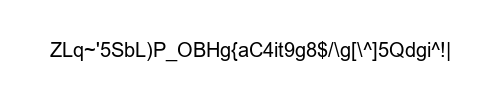

In [111]:
generate_GIF(text_list);